## Read in the training and test data

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd '/content/drive/Shared drives/SI 670 Project'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Shared drives/SI 670 Project


In [ ]:
import pandas as pd
import numpy as np
import nltk
from tqdm import tqdm

train = pd.read_csv ('data/WikiLarge_Train.csv')
test = pd.read_csv ('data/WikiLarge_Test.csv')
train_df = train.copy()
test_df = test.copy()
# shuffle the training data
train_df = train_df.sample(frac = 1)

In [ ]:
train_df.head()

,original_text,label
219643,Baleen whales are generally larger than toothe...,0
93157,"Over their four decade career , Heart has had ...",1
5178,CarÃ me was set a test by Talleyrand : to crea...,1
145317,Stallone has also mentioned that he would like...,1
398243,Image : Francesco Hayez 025 .,0


In [ ]:
test_df.head()

,id,original_text,label
0,0,-2011,NaN
1,1,-2011,NaN
2,2,-2000,NaN
3,3,-1997,NaN
4,4,1.636,NaN


In [ ]:
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

## Data prepocessing and feature extraction

We create two kind of features: numerical feature and numerical feature 

### Numerical feature
We create some numerical features by calculating some summary statistics after combining training dataset with other files.

#### 1.1 Generate percentage of frequently used words for each sentence in training data

In [ ]:
# # Create the frequency word wordset list from dale_chall.txt
# frequency_wordset_df = pd.read_csv('data/dale_chall.txt', sep="\n", header=None)
# frequency_wordset = list(frequency_wordset_df[0])

# # Generate percentage of frequently used words for each sentence in training data
# def frequency_word_percentage(sentence):
#   word_list = sentence.split(" ")
#   count = 0
#   for i in word_list:
#     if i in frequency_wordset:
#       count += 1
#   return count/len(word_list)

# fre_perc_list = []
# for i in tqdm(range(len(train_df))):
#   sentence = train_df.iloc[i]["original_text"]
#   fre_perc_list.append(frequency_word_percentage(sentence))

# # Display and save percentage of frequently used words as a numerical feature
# train_df["frequency word percentage"] = fre_perc_list
# train_df.to_csv("train_fwp.csv")
train_df.head()

,original_text,label
219643,Baleen whales are generally larger than toothe...,0
93157,"Over their four decade career , Heart has had ...",1
5178,CarÃ me was set a test by Talleyrand : to crea...,1
145317,Stallone has also mentioned that he would like...,1
398243,Image : Francesco Hayez 025 .,0


In [ ]:
train_fwp = pd.read_csv("data/train_fwp.csv",index_col=0)
train_fwp.head()

,original_text,label,frequency word percentage
0,There is manuscript evidence that Austen conti...,1,0.465116
1,"In a remarkable comparative analysis , Mandaea...",1,0.217391
2,"Before Persephone was released to Hermes , who...",1,0.543478
3,Cogeneration plants are commonly found in dist...,1,0.256410
4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",1,0.361111


#### 1.2 Generate mean concreteness and mean unknown percentage of each sentence

In [ ]:
# # Create the concreteness/unknown percentage list from Concreteness_ratings_Brysbaert_et_al_BRM.txt
# concreteness_df = pd.read_csv("data/Concreteness_ratings_Brysbaert_et_al_BRM.txt", sep="\t")

# # Generate mean concreteness and mean unknown percentage of each sentence in training data
# concreteness_dict = {}
# for i in tqdm(range(len(concreteness_df))):
#   word = concreteness_df.iloc[i]["Word"]
#   if word not in concreteness_dict:
#     concreteness_dict[word] = {}
#   concreteness_dict[word]["conc_m"] = concreteness_df.iloc[i]["Conc.M"]
#   concreteness_dict[word]["percent_unknow"] = 1 - concreteness_df.iloc[i]["Percent_known"]

# def check_difficulty(sentence):
#   word_list = sentence.split(" ")
#   count = 0
#   conc = []
#   unknow = []
#   for i in word_list:
#     if i in concreteness_dict:
#       count += 1
#       conc.append(concreteness_dict[i]["conc_m"])
#       unknow.append(concreteness_dict[i]["percent_unknow"])
#   if conc != [] and unknow != []:
#     mean_conc = sum(conc) / len(conc)
#     mean_unknow = sum(unknow) / len(unknow)
#   else:
#     mean_conc = float(-100)
#     mean_unknow = float(-100)
#   return [mean_conc,mean_unknow]

# train_fwp = pd.read_csv("data/train_fwp.csv",index_col=0)
# train_df1 = train_fwp.copy()
# conc_all = []
# mean_conc = []
# unknow_all = []
# mean_unknow = []
# for i in tqdm(range(len(train_df1))):
#   sentence = train_df1.iloc[i]["original_text"]
#   diff = check_difficulty(sentence)
#   s_conc = diff[0]
#   s_unknow = diff[1]
#   conc_all.append(s_conc)
#   unknow_all.append(s_unknow)
#   if s_conc != -100 and s_unknow != -100:
#     mean_conc.append(s_conc)
#     mean_unknow.append(s_unknow)
# mean_conc_all = sum(mean_conc) / len(mean_conc) 
# mean_unknow_all = sum(mean_unknow) / len(mean_unknow)

# for i in range(len(conc_all)):
#   if conc_all[i] == -100:
#     conc_all[i] = mean_conc_all

# for i in range(len(unknow_all)):
#   if unknow_all[i] == -100:
#     unknow_all[i] = mean_unknow_all

# # Display and save mean concreteness and mean unknown percentage as a numerical feature
# train_df1["mean_concretness"] = conc_all
# train_df1["mean_unknow_percentage"] = unknow_all
# train_df1.to_csv("data/train_fwp_cu.csv")
# train_df1.head()

In [ ]:
train_fwp_cu = pd.read_csv("data/train_fwp_cu.csv",index_col=0)
train_fwp_cu.head()

,original_text,label,frequency word percentage,mean_concretness,mean_unknow_percentage
0,There is manuscript evidence that Austen conti...,1,0.465116,2.360769,0.004231
1,"In a remarkable comparative analysis , Mandaea...",1,0.217391,2.037273,0.006364
2,"Before Persephone was released to Hermes , who...",1,0.543478,2.369697,0.006364
3,Cogeneration plants are commonly found in dist...,1,0.256410,2.997143,0.006667
4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",1,0.361111,2.364667,0.010667


#### 1.3 Generate mean AoA of each sentence

In [ ]:
# # Create the AoA list from AoA_51715_words.csv
# aoa_df = pd.read_csv("data/AoA_51715_words.csv", encoding= 'unicode_escape')
# aoa_df["AoA_Kup_lem"].isna().sum() / len(aoa_df)
# aoa_df = aoa_df.dropna(subset=["Word", "AoA_Kup_lem"])

# # Generate  mean AoA of each sentence in training data
# aoa_dict = {}
# for i in tqdm(range(len(aoa_df))):
#   word = aoa_df.iloc[i]["Word"]
#   aoa = aoa_df.iloc[i]["AoA_Kup_lem"]
#   aoa_dict[word] = aoa

# def mean_aoa(sentence):
#   word_list = sentence.split(" ")
#   aoa_list = []
#   for i in word_list:
#     if i in aoa_dict:
#       aoa_list.append(aoa_dict[i])
#   if aoa_list != []:
#     mean_aoa = sum(aoa_list) / len(aoa_list)
#   else:
#     mean_aoa = float(-100)
#   return mean_aoa

# train_fwp_cu = pd.read_csv("data/train_fwp_cu.csv",index_col=0)
# train_df2 = train_fwp_cu.copy()

# aoa_all = []
# mean_aoa_list = []
# for i in tqdm(range(len(train_df2))):
#   sentence = train_df2.iloc[i]["original_text"]
#   aoa = mean_aoa(sentence)
#   aoa_all.append(aoa)
#   if aoa != -100:
#     mean_aoa_list.append(aoa)
# mean_aoa_all = sum(mean_aoa_list) / len(mean_aoa_list) 

# for i in range(len(aoa_all)):
#   if aoa_all[i] == -100:
#     aoa_all[i] = mean_aoa_all

# # Display and save mean AoA as a numerical feature
# train_df2["mean_aoa"] = aoa_all
# train_df2.to_csv("data/train_fwp_cu_aoa.csv")
# train_df2.head()

#### 1.4 Display numerical features

In [ ]:
df_numeric1 = pd.read_csv("data/train_fwp_cu_aoa.csv",index_col=0)
df_numeric = df_numeric1.copy()
df_numeric.head()

,original_text,label,frequency word percentage,mean_concretness,mean_unknow_percentage,mean_aoa
0,There is manuscript evidence that Austen conti...,1,0.465116,2.360769,0.004231,5.947857
1,"In a remarkable comparative analysis , Mandaea...",1,0.217391,2.037273,0.006364,7.711667
2,"Before Persephone was released to Hermes , who...",1,0.543478,2.369697,0.006364,5.318611
3,Cogeneration plants are commonly found in dist...,1,0.256410,2.997143,0.006667,6.738889
4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",1,0.361111,2.364667,0.010667,5.396667


### Text feature
We first split up a larger body of text into words called tokens. Then we use word embedding as a vector which represents the features of these tokens and use the vectors as the features to classify the sentences.

In [ ]:
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences

# maxlen = 40
# max_features = 20000

# # Process training data
# dataset_train = train_df.values
# X_train = dataset_train[:, 0]
# y_train = dataset_train[:, 1]
# y_train_txt = np.asarray(y_train).astype(np.float32)
# text_train = X_train.reshape(-1)
# tokenizer = Tokenizer(num_words=max_features, lower=True)
# ## covert tokens to sequences
# tokenizer.fit_on_texts(text_train)
# sequences_train = tokenizer.texts_to_sequences(text_train)
# ## Pad sequences
# input_train = pad_sequences(sequences_train, maxlen=maxlen)
# print('input_train shape:', input_train.shape)

## Methods and Evaluation
We first fit two baseline models: 
(a) dummy classifier baseline and
(b) a simple method baseline i.e, Naive Bayes

We then fit three different supervised learning
models: K nearest-neighbor, tree-based methods and LSTM. The first two models use numerical features and the last model use text features.

We use 5-fold cross-validation to compare performance of the above three different supervised learning methods.

#### 7 Support Vector Machine

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC
# from sklearn.model_selection import cross_val_score
# from sklearn.pipeline import Pipeline

# X = df_numeric.iloc[:,2:6]
# y = df_numeric.iloc[:,1]

# # define the pipeline
# steps = list()
# steps.append(('scaler', StandardScaler()))
# steps.append(('model', SVC(gamma='auto', verbose=10)))
# pipeline = Pipeline(steps=steps)

# acc_svm = cross_val_score(pipeline, X, y, scoring='accuracy', cv = 5, verbose=10)
# print("Random Forest classifier accuracy: ", np.mean(acc_svm))

In [ ]:
def get_metrics_score(model_name, scores):
  print(f"{model_name} classifier accuracy: ", np.mean(score_result['test_accuracy']))
  print(f"{model_name} classifier f1: ", np.mean(scores['test_f1']))
  print(f"{model_name} classifier precision: ", np.mean(scores['test_precision']))
  print(f"{model_name} classifier recall: ", np.mean(scores['test_recall']))
  return np.mean(score_result['test_accuracy']), np.mean(scores['test_f1']), np.mean(scores['test_precision']), np.mean(scores['test_recall'])
scorings = ['accuracy','f1', 'precision', 'recall']

#### 8 Random Forest

##### Tune parameters on subset

In [ ]:
y[200000: 220000].mean()

0.4192

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X = df_numeric.iloc[:,2:6]
y = df_numeric.iloc[:,1]
params = {
    'max_depth': [8, 10, 12],
    'max_features': [3],
    'min_samples_leaf': [5, 6, 7],
    # 'min_samples_split': [8, 10, 12],
    # 'n_estimators': [100, 200, 300, 1000]
}

clf = RandomForestClassifier(random_state=0)
clf = GridSearchCV(clf, param_grid = params, cv = 5, verbose=3, return_train_score=True)
clf.fit(X[200000: 220000], y[200000: 220000])
# rf_result = get_metrics_score("Random Forest", score_result)
# rf_result

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END max_depth=8, max_features=3, min_samples_leaf=5;, score=(train=0.673, test=0.623) total time=   2.5s
[CV 2/5] END max_depth=8, max_features=3, min_samples_leaf=5;, score=(train=0.662, test=0.631) total time=   2.5s
[CV 3/5] END max_depth=8, max_features=3, min_samples_leaf=5;, score=(train=0.669, test=0.623) total time=   2.5s
[CV 4/5] END max_depth=8, max_features=3, min_samples_leaf=5;, score=(train=0.666, test=0.640) total time=   2.4s
[CV 5/5] END max_depth=8, max_features=3, min_samples_leaf=5;, score=(train=0.667, test=0.630) total time=   2.4s
[CV 1/5] END max_depth=8, max_features=3, min_samples_leaf=6;, score=(train=0.673, test=0.622) total time=   2.4s
[CV 2/5] END max_depth=8, max_features=3, min_samples_leaf=6;, score=(train=0.661, test=0.631) total time=   2.4s
[CV 3/5] END max_depth=8, max_features=3, min_samples_leaf=6;, score=(train=0.666, test=0.625) total time=   2.4s
[CV 4/5] END max_depth=8, ma

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [8, 10, 12], 'max_features': [3],
                         'min_samples_leaf': [5, 6, 7]},
             return_train_score=True, verbose=3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X = df_numeric.iloc[:,2:6]
y = df_numeric.iloc[:,1]
params = {
    'max_depth': [8, 10, 12],
    'max_features': [3],
    'min_samples_leaf': [5, 6, 7],
    # 'min_samples_split': [8, 10, 12],
    # 'n_estimators': [100, 200, 300, 1000]
}

clf = RandomForestClassifier(random_state=0)
clf = GridSearchCV(clf, param_grid = params, cv = 5, verbose=3, return_train_score=True)
clf.fit(X[200000: 220000], y[200000: 220000])
# rf_result = get_metrics_score("Random Forest", score_result)
# rf_result

#### Tune paramters in whole dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X = df_numeric.iloc[:,2:6]
y = df_numeric.iloc[:,1]
params = {
    'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40],
    'max_features': [3],
    'min_samples_leaf': [3],
}

clf = RandomForestClassifier(random_state=0)
clf = GridSearchCV(clf, param_grid = params, cv = 5, verbose=3, return_train_score=True)
clf.fit(X, y)
# rf_result = get_metrics_score("Random Forest", score_result)
# rf_result

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END max_depth=5, max_features=3, min_samples_leaf=3;, score=(train=0.620, test=0.620) total time=  41.6s
[CV 2/5] END max_depth=5, max_features=3, min_samples_leaf=3;, score=(train=0.620, test=0.618) total time=  42.0s
[CV 3/5] END max_depth=5, max_features=3, min_samples_leaf=3;, score=(train=0.622, test=0.622) total time=  41.6s
[CV 4/5] END max_depth=5, max_features=3, min_samples_leaf=3;, score=(train=0.620, test=0.619) total time=  41.1s
[CV 5/5] END max_depth=5, max_features=3, min_samples_leaf=3;, score=(train=0.620, test=0.619) total time=  40.9s
[CV 1/5] END max_depth=10, max_features=3, min_samples_leaf=3;, score=(train=0.644, test=0.638) total time= 1.2min
[CV 2/5] END max_depth=10, max_features=3, min_samples_leaf=3;, score=(train=0.646, test=0.636) total time= 1.2min
[CV 3/5] END max_depth=10, max_features=3, min_samples_leaf=3;, score=(train=0.645, test=0.639) total time= 1.2min
[CV 4/5] END max_depth=10

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30, 35, 40],
                         'max_features': [3], 'min_samples_leaf': [3]},
             return_train_score=True, verbose=3)

In [ ]:
clf.best_score_

0.6920085013450754

In [ ]:
# df_acc_sensi = pd.DataFrame()
# df_acc_sensi['max_depth'] = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40]
# df_acc_sensi['training_accuracy'] = clf.cv_results_['mean_train_score']
# df_acc_sensi['test_accuracy'] = clf.cv_results_['mean_test_score']
# df_acc_sensi.to_csv("accuracy_sensitivity", index=False)

In [ ]:
df_acc_sensi = pd.read_csv("accuracy_sensitivity")
df_acc_sensi

,max_depth,training_accuracy,test_accuracy
0,1,0.585825,0.585808
1,2,0.591426,0.591408
2,3,0.598519,0.598453
3,4,0.611959,0.611657
4,5,0.620409,0.619748
5,10,0.644730,0.637280
6,15,0.700298,0.655413
7,20,0.796453,0.674584
8,25,0.882045,0.686713
9,30,0.923125,0.690168


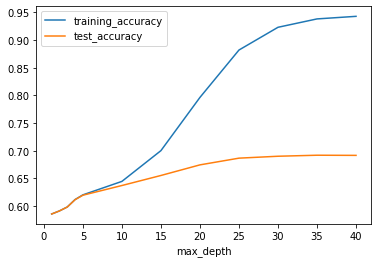

In [ ]:
df_acc_sensi.plot(x='max_depth')

[CV 1/5] END max_depth=30, max_features=3, min_samples_leaf=3;, score=(train=0.922, test=0.692) total time= 2.3min 

[CV 2/5] END max_depth=30, max_features=3, min_samples_leaf=3;, score=(train=0.924, test=0.688) total time= 2.3min

[CV 3/5] END max_depth=30, max_features=3, min_samples_leaf=3;, score=(train=0.924, test=0.690) total time= 2.3min

[CV 4/5] END max_depth=30, max_features=3, min_samples_leaf=3;, score=(train=0.922, test=0.692) total time= 2.3min

[CV 5/5] END max_depth=30, max_features=3, min_samples_leaf=3;, score=(train=0.923, test=0.688) total time= 2.3min
